In [1]:
%matplotlib inline
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import utils
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [2]:
df = pd.read_excel(r'./dataset.xlsx')
df = df.set_index(df.iloc[:,0].name)

In [3]:
AUDIO_DIR = os.environ.get('AUDIO_DIR')
tracks = utils.load('./fma_metadata/tracks.csv')
genres = utils.load('./fma_metadata/genres.csv')
features = utils.load('./fma_metadata/features.csv')
echonest = utils.load('./fma_metadata/echonest.csv')
np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

In [4]:
df['year']  = tracks['track','date_created'].dt.year
df = df.drop('Electronic labeler', axis = 1)

In [5]:
#df['year'].value_counts()

pre2011 = [1 if x<2011 else 0 for x in df['year']]
df['pre2011']= pre2011 
df=df.drop('year', axis=1)

## Naive Bayes
Non abbiamo variabili categoriche nel dataset, perciò usiamo GaussianNB

In [6]:
attributes = [col for col in df.columns if col != 'pre2011']
X = df[attributes].values
y = df['pre2011']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [7]:
clf = GaussianNB()
clf = clf.fit(X_train, y_train)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.718925421010425
F1-score [0.52084757 0.80113475]
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       730
           1       0.80      0.80      0.80      1764

    accuracy                           0.72      2494
   macro avg       0.66      0.66      0.66      2494
weighted avg       0.72      0.72      0.72      2494



In [10]:
confusion_matrix(y_test, y_pred)

array([[ 381,  349],
       [ 352, 1412]])

In [11]:
fpr1, tpr1, _ = roc_curve(y_test, y_pred)
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

roc_auc1 = roc_auc_score(y_test, y_pred)

0.6611856614792035


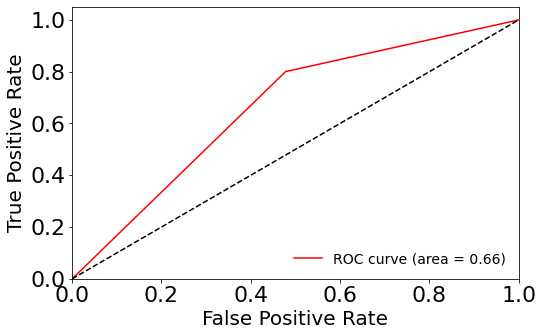

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(fpr1, tpr1, label='ROC curve (area = %0.2f)' % (roc_auc1), c = 'r')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0],)
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

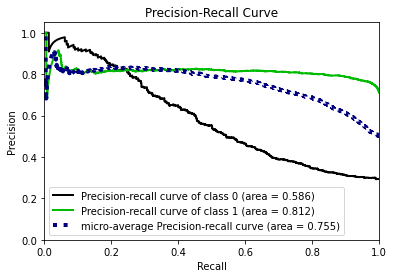

In [13]:
y_score = clf.predict_proba(X_test)

plot_precision_recall(y_test, y_score)
plt.show()

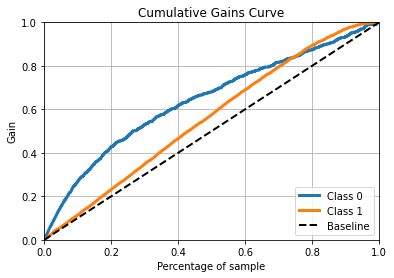

In [14]:
plot_cumulative_gain(y_test, y_score)
plt.show()

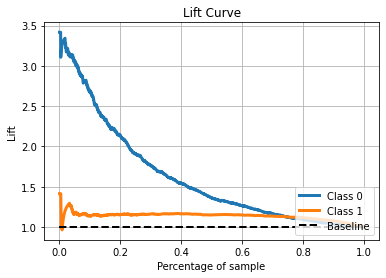

In [15]:
plot_lift_curve(y_test, y_score)
plt.show()